# **Analysis of Google Play Store Reviews**
## **Requirements**
 *  Use code blocks to show clean work.
 *  Use markdown blocks for titles and explanations.
 *  Show cleaning process and analysis process clearly. Verify if cleaning is required
 *  Include at least 5 charts 
 *  End summary of main points

## **Methods and Objectives**
-  Import the data sets
-  inspect and clean data by looking for the following:
    -  unique values
    -  duplicates
    -  Null or NaN values
    -  Drop entries with less than 5 installations
-  Visualise the following questions:
    - Which apps are the most popular?
    - Which apps have the highest ratings and are there overlaps?
    - If there are multiple in the same category how do they perform against each other?
    - Are the reviews reliable?

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import spearmanr

In [58]:
data_app = pd.read_csv('~/Downloads/archive/googleplaystore.csv', header ='infer', sep = ',')
data_reviews = pd.read_csv('~/Downloads/archive/googleplaystore_user_reviews.csv', header ='infer', sep = ',')
data_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [59]:
# Look at the data. Anticipating cleaning one set first
data_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


## **Initial thoughts**
### Some points to consider for analysis
-  Splitting the data by app category will be necessary
-  Don't just drop null values, apps like 'Parkinson Exercices' still provide insights even without a rating
-  A Cumulative sum of installs to compare category representative of the store market occupancy
-  Percentage of positive reviews per category for w.r.t. type
-  Distribution of rarings per category

In [60]:
# check data reviews set 
Houzz =data_reviews[data_reviews['App'] == "Houzz Interior Design Ideas"].reset_index(drop= True)
Houzz.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
1,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
2,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
3,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
4,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


### Not very helpful. Instead of droping these reviews however I will note this for further inspection
Might be better to consolidate the reviews immediately but a few more apps will be investigated first before initialising consolidation

In [61]:
cat_names = data_app['Category'].unique()
cat_names

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

## Category 1.9?

In [62]:
odd_app_name =data_app[data_app['Category'] == "1.9"]
odd_app_name

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


## The data on that row seems out of place. Clearly a shift is necessary from the category index onwards

In [100]:
# Shifting the row details and filling the empty cell with 'PHOTOGRAPHY
original_types = data_app.dtypes
data_app.loc[10472, 'Category':] = data_app.loc[10472, 'Category':].shift(1, fill_value='PHOTOGRAPHY')
unique_values1 = data_app['Category'].unique()
unique_values1
n10472 = data_app.loc[[10472]]
n10472

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,PHOTOGRAPHY,PHOTOGRAPHY,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Photography,"February 11, 2018"


In [64]:
# Filling the empty cell
if pd.isna(data_app.loc[10472, 'Genres']):
    data_app.loc[10472, 'Genres'] = 'Photography'
n10472 = data_app.loc[[10472]]
n10472

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Photography,"February 11, 2018",1.0.19,4.0 and up


In [65]:
# Cleaning App data set
data_app_nd = data_app.drop_duplicates(subset='App', keep='first').reset_index(drop = True)
data_app_nd

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9656,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9657,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9658,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [66]:


# Convert 'Size' column: Replace 'k' with 'e3', 'M' with 'e6'
data_app_nd.loc[:, 'Size'] = data_app_nd['Size'].replace(
    {'k': 'e3', 'M': 'e6'}, regex=True
)

# Convert numeric values while keeping 'Varies with device' unchanged
data_app_nd.loc[:, 'Size'] = pd.to_numeric(data_app_nd['Size'], errors='coerce')

# Function to replace "Varies with device" with the mode of the same category
def fill_varies_with_mode(df):
    df = df.copy()  # Avoid modifying a slice directly
    for category in df['Category'].unique():
        mode_value = df.loc[df['Category'] == category, 'Size'].mode()
        if not mode_value.empty:  # Check if mode exists
            df.loc[(df['Category'] == category) & (df['Size'].isna()), 'Size'] = mode_value[0]
    return df

# Apply the function
data_app_nd = fill_varies_with_mode(data_app_nd)
data_app_nd.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [67]:
#call dtypes for last updated to date type, 
data_app_nd.dtypes

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

In [68]:
# Identifying empty cells
null_values = data_app_nd.isna().sum()
null_values

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [69]:
and_ver_nan= data_app_nd[data_app_nd['Android Ver'].isna()]
and_ver_nan

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3549,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
3586,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100000.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [70]:
# Function to replace "Varies with device" with the mode of the same category
def fill_NaN_with_mode(df):
    df = df.copy()  # Avoid modifying the original DataFrame
    personalization_category = 'PERSONALIZATION'  # Define the category of interest
    
    # Get the mode for the 'Android Ver' column for 'PERSONALIZATION' category
    mode_value = df.loc[df['Category'] == personalization_category, 'Android Ver'].mode()
    
    # Check if a mode exists (i.e., the series is not empty)
    if not mode_value.empty:
        mode_value = mode_value[0]  # Take the first mode value
        
        # Fill NaN values in the 'Android Ver' column for the 'PERSONALIZATION' category
        df.loc[(df['Category'] == personalization_category) & (df['Android Ver'].isna()), 'Android Ver'] = mode_value
    
    return df


data_app_nd = fill_NaN_with_mode(data_app_nd)
null_values = data_app_nd.isna().sum()
null_values

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64

In [71]:
cur_ver= data_app_nd[data_app_nd['Current Ver'].isna()]
cur_ver

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700000.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1265,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11000.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
5314,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700000.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
5772,BT Master,FAMILY,NaN,0,222000.0,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
6287,Dots puzzle,FAMILY,4.0,179,14000000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
6360,Calculate My IQ,FAMILY,NaN,44,7200000.0,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
6671,UFO-CQ,TOOLS,NaN,1,237000.0,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
9170,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658000.0,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [72]:
# Function to replace "Varies with device" with the mode of the same category
def fill_NaN_with_cv_mode(df):
    df = df.copy()  # Avoid modifying the original DataFrame
    
    # Calculate the general mode of the 'Current Ver' column
    mode_value = df['Current Ver'].mode()
    
    # Check if a mode exists (i.e., the series is not empty)
    if not mode_value.empty:
        mode_value = mode_value[0]  # Take the first mode value
        
        # Fill NaN values in the 'Android Ver' column with the mode of 'Current Ver'
        df.loc[df['Current Ver'].isna(), 'Current Ver'] = mode_value
    
    return df

# Apply the function to your DataFrame
data_app_nd = fill_NaN_with_cv_mode(data_app_nd)
null_values = data_app_nd.isna().sum()
null_values

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [73]:
rating_= data_app_nd[data_app_nd['Rating'].isna()]
rating_

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7000000.0,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5700000.0,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3700000.0,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7400000.0,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2900000.0,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Cardio-FR,MEDICAL,NaN,67,82000000.0,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
9644,Naruto & Boruto FR,SOCIAL,NaN,7,7700000.0,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
9650,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9800000.0,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
9654,FR Forms,BUSINESS,NaN,0,9600000.0,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [74]:
data_app_nd.loc[:, 'Rating'] = pd.to_numeric(data_app_nd['Rating'], errors='coerce')

def fill_NaN_with_r_mode(df):
    df = df.copy()  # Avoid modifying the original DataFrame
    
    # Calculate the general mode of the 'Current Ver' column
    mode_value = df['Rating'].mode()
    
    # Check if a mode exists (i.e., the series is not empty)
    if not mode_value.empty:
        mode_value = mode_value[0]  # Take the first mode value
        
        # Fill NaN values in the 'Android Ver' column with the mode of 'Current Ver'
        df.loc[df['Rating'].isna(), 'Rating'] = mode_value
    
    return df

# Apply the function to your DataFrame
data_app_nd = fill_NaN_with_r_mode(data_app_nd)
null_values = data_app_nd.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [75]:
type_= data_app_nd[data_app_nd['Type'].isna()]
type_
# since this has an install value of 0, this will be dropped in a few cells

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8028,Command & Conquer: Rivals,FAMILY,4.3,0,13000000.0,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [76]:
# strip the '+' from the intalls value we need a format that pandas can use
data_app_nd['Installs'] = data_app_nd['Installs'].astype(str)

# Remove '+' and ',' safely and convert to integer
data_app_nd['Installs'] = pd.to_numeric(
    data_app_nd['Installs'].str.replace('+', '', regex=False).str.replace(',', ''), 
    errors='coerce'  # Converts invalid values (e.g., 'Varies with device') to NaN
).fillna(0).astype(int)  # Replace NaN with 0 (or another default value)

# Now filter rows where Installs < 100
noval_ = data_app_nd[data_app_nd['Installs'] < 5]
noval_

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
548,Healthy Relationships Guide,DATING,4.3,0,8200000.0,1,Free,0,Everyone,Dating,"July 31, 2018",2.0,4.0.3 and up
551,PlusOne,DATING,4.3,0,10000000.0,1,Free,0,Mature 17+,Dating,"July 17, 2018",1.1.1,4.2 and up
1900,Visualmed,MEDICAL,4.3,0,3100000.0,1,Paid,$2.99,Everyone,Medical,"August 1, 2018",1.0,4.1 and up
1903,Be the Expert in Phlebotomy - Professional Nur...,MEDICAL,4.3,0,5000000.0,1,Paid,$0.99,Everyone,Medical,"July 24, 2018",1.0,4.0.3 and up
1932,KBA-EZ Health Guide,MEDICAL,5.0,4,25000000.0,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9525,F-O-Meter,FAMILY,4.3,0,2800000.0,1,Free,0,Mature 17+,Entertainment,"August 2, 2018",1.0.1,4.0 and up
9532,Custos F.O.,BUSINESS,4.3,0,9700000.0,1,Free,0,Everyone,Business,"June 20, 2018",4.1.0,4.1 and up
9566,FP Boss,FINANCE,4.3,1,5800000.0,1,Free,0,Everyone,Finance,"July 27, 2018",1.0.2,5.0 and up
9584,FP Transportation,AUTO_AND_VEHICLES,4.3,1,885000.0,1,Free,0,Everyone,Auto & Vehicles,"March 9, 2018",10.0.0,4.0 and up


In [77]:
null_values = data_app_nd.isna().sum()
null_values

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Drop rows with less than 5 installs


In [78]:
data_app_nd = data_app_nd[data_app_nd['Installs'] >= 5].reset_index(drop=True)

In [79]:
null_values = data_app_nd.isna().sum()
null_values

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [80]:
data_app_nd

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9574,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9575,Parkinson Exercices FR,MEDICAL,4.3,3,9500000.0,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9576,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,11000000.0,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [81]:
data_app_nd.Price=data_app_nd.Price.apply(lambda x: x.strip('$'))

Text(0, 0.5, 'Count')

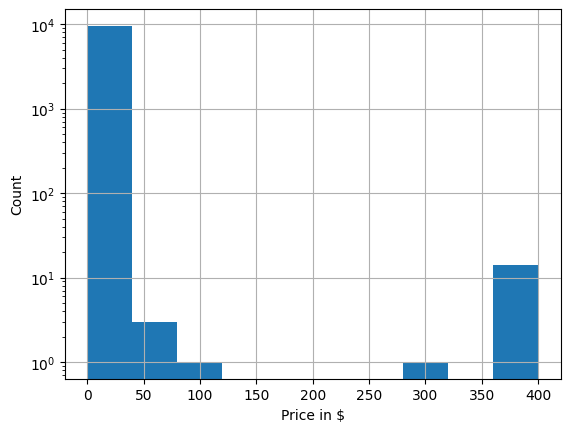

In [98]:
data_app_nd.Price=pd.to_numeric(data_app_nd.Price)
data_app_nd.Price.hist();
plt.yscale('log')
plt.xlabel('Price in $')
plt.ylabel('Count')

# **App Popularity**
From the chart abobe w can see that most app installations between \\$0 - \\$40.
Investigating the categories for insights will inform what to aim for in terms or category and price range

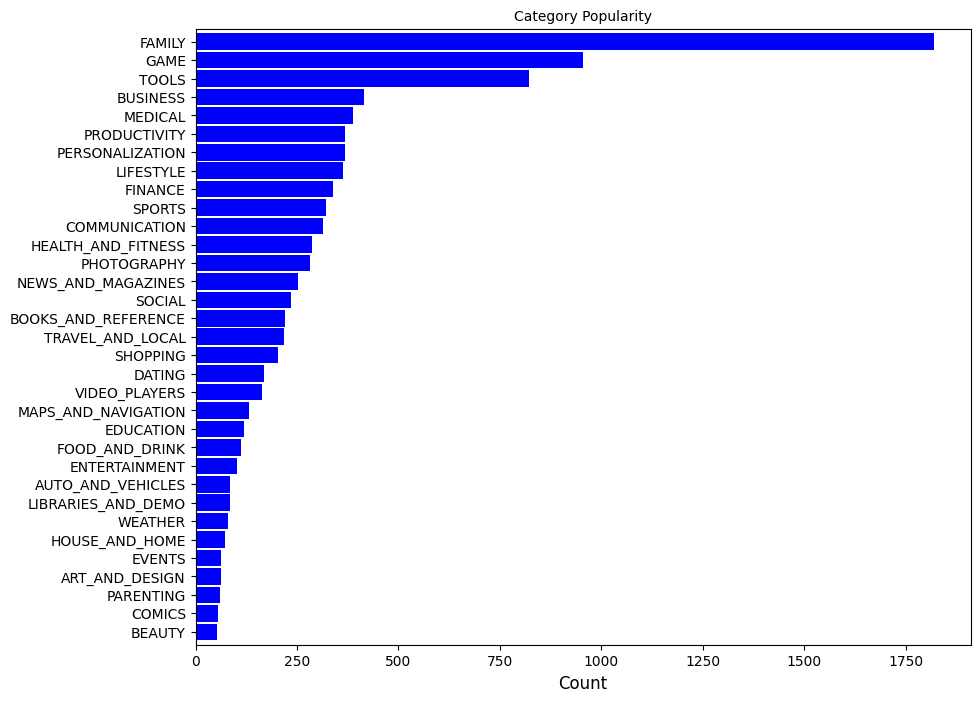

In [83]:
# reordering the categories to show the highest count at the top
category_counts = data_app_nd.Category.value_counts().sort_values(ascending=True)

# Plot a horizontal bar chart
cd = category_counts.plot(kind='barh', figsize=(10, 8), color='b',  width=0.9)


cd.set_xlabel('Count', fontsize=12)  # Set the X-axis label
cd.set_title('Category Popularity', fontsize=10)  # Set the title
cd.set_ylabel('')  # Remove the y-axis label

# Make the text on the y-axis smaller
cd.tick_params(axis='y', labelsize=10)


# **What are the top 10 apps in terms of popularity as a percentage?**
## Looking for 'App', 'Category', 'Rating', 'Installs' and 'Price' Columns

In [84]:
# Top 10 categories as a percentage of the total cleaned set


top_10_categories = data_app_nd.Category.value_counts().nlargest(10).index
filtered_data = data_app_nd[data_app_nd['Category'].isin(top_10_categories)]

# sum total
category_summary = filtered_data.groupby('Category').agg(
    Rating=('Rating', 'mean'),       
    Installs=('Installs', 'sum'),    
    Price=('Price', 'mean')          
)

category_summary['Percentage of Total'] = (filtered_data.groupby('Category').size() / len(data_app_nd)) * 100


category_summary = category_summary.sort_values(by='Percentage of Total', ascending=False)


category_summary = category_summary.head(10)


category_summary

,Rating,Installs,Price,Percentage of Total
Category,,,,
FAMILY,4.193623,4427941495,1.311941,18.991439
GAME,4.248218,13878924410,0.292306,9.960326
TOOLS,4.072506,8001771910,0.323309,8.582167
BUSINESS,4.171981,697164860,0.423406,4.322406
MEDICAL,4.198191,38193170,2.035478,4.040510
PRODUCTIVITY,4.204878,5793091365,0.260000,3.852579
PERSONALIZATION,4.326087,1532494775,0.391386,3.842138
LIFESTYLE,4.129121,503823535,5.387033,3.800376
FINANCE,4.135693,455348730,7.197257,3.539361


In [85]:

top_20_apps = data_app_nd.sort_values('Installs', ascending=False).head(20)



top_20_apps[['App', 'Installs', 'Category', 'Rating', 'Price']].reset_index(drop = True)

top_20_apps.index = range(1, len(top_20_apps) + 1)
top_20_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2,Instagram,SOCIAL,4.5,66577313,63000000.0,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3,Facebook,SOCIAL,4.1,78158306,63000000.0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
4,Google+,SOCIAL,4.2,4831125,63000000.0,1000000000,Free,0.0,Teen,Social,"July 26, 2018",Varies with device,Varies with device
5,Google Photos,PHOTOGRAPHY,4.5,10858556,17000000.0,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
6,Google Play Games,ENTERTAINMENT,4.3,7165362,19000000.0,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
7,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689,22000000.0,1000000000,Free,0.0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device
8,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,22000000.0,1000000000,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
9,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,17000000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
10,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,17000000.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


# **Interesing confirmation that the free apps are leading the Install list on the app store.**
## Also key to note that these apps predominantly Google and Facebook (now META) have multiple leading applications with some installed by default on Android



## **Use of Pairplot to assess covariance**



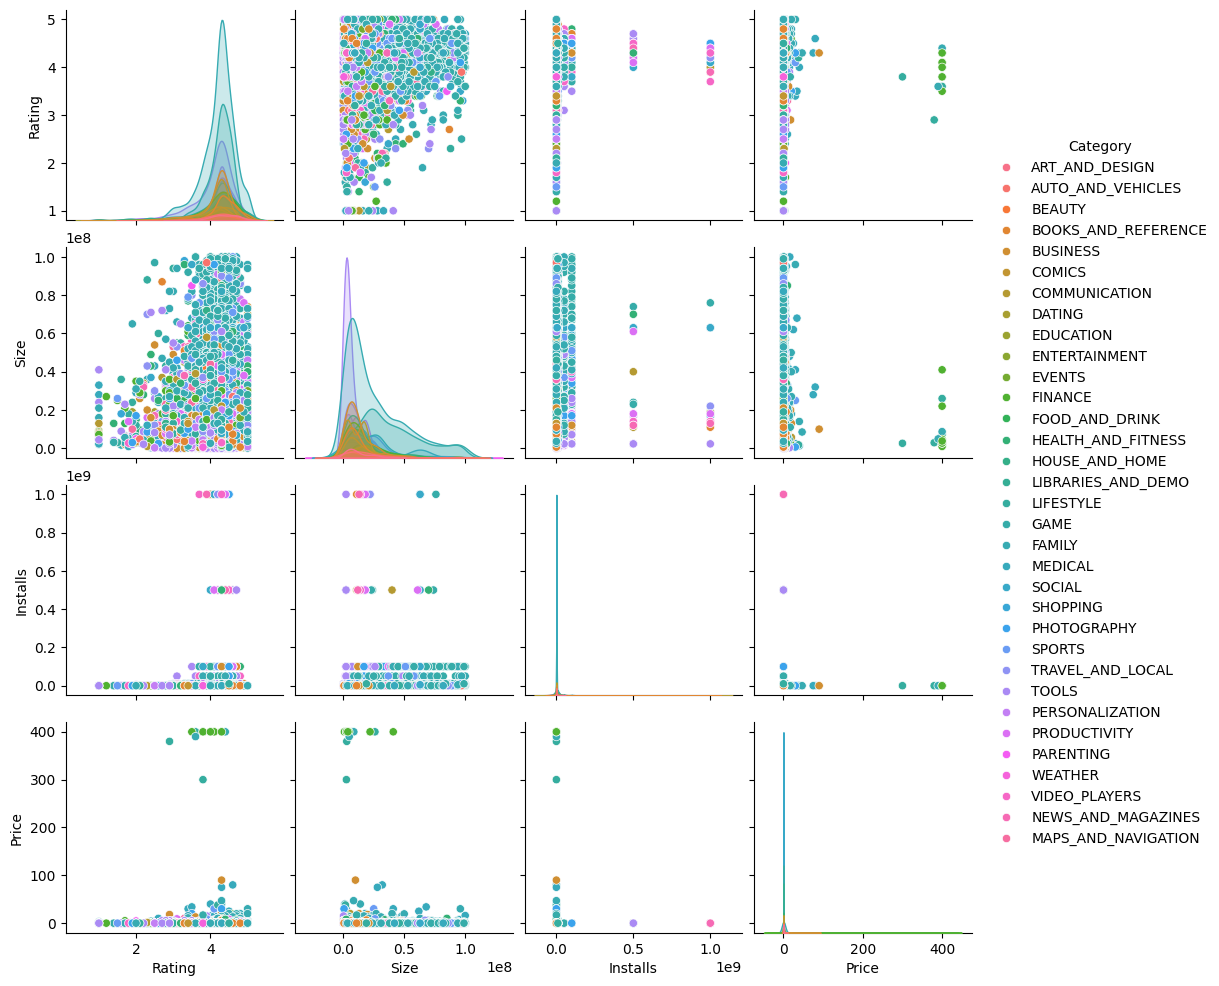

In [86]:
sns.pairplot(data_app_nd, hue= "Category",diag_kind='kde')

## Another method is to use **Poisson Distribution**
### The point of this is Look at the Maximum Likelihood Estimation of app installation on devices based on the price, rating and category.
### By the end of this calculation there will be clarity on cumulative corellation between these variables
# This is a techincal section so please feel free to skip the next table, a summary will be provided post table and chart to describe the results.




In [90]:
model = smf.poisson('Installs ~ Price + Rating + Category', data=data_app_nd).fit()

# Print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 16418670.296153
         Iterations 17
                          Poisson Regression Results                          
Dep. Variable:               Installs   No. Observations:                 9578
Model:                        Poisson   Df Residuals:                     9506
Method:                           MLE   Df Model:                           71
Date:                Fri, 31 Jan 2025   Pseudo R-squ.:                  0.2511
Time:                        16:21:54   Log-Likelihood:            -1.5726e+11
converged:                       True   LL-Null:                   -2.0998e+11
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           4.4348      0.014    3

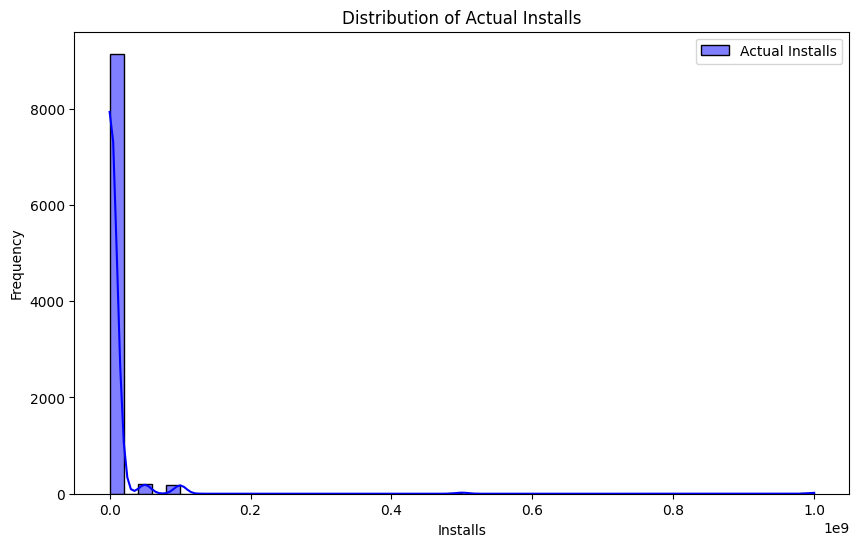

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(data_app_nd['Installs'], bins=50, kde=True, color='blue', label='Actual Installs')
plt.title('Distribution of Actual Installs')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Description 
-  The coefficient for the AUTO_AND_VEHICLES category is -0.9649, meaning apps in this category have fewer installs compared to the baseline 
-  Price: The coefficient for Price is -1.7558, suggesting that as the corellation is negative. The more expensive your app is, the less installs it will have
-  The p-value for the log-likelihood ratio (LLR) is 0. This means that the model is significant i.e. there is a relationship between installs and at least one variable

# Clean User Review Dataset

In [41]:
data_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [42]:
data_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [43]:
# dropping rows that do not have enough data to be recoverable without input validation
data_reviews = data_reviews.dropna(subset=['Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']).reset_index(drop=True)
data_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
4,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
37427,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
37428,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
37429,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
37430,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [97]:
# observe/filter for unique values
data_revapp= data_reviews['App'].unique()

# Verifying all values are in the acceptable range

In [45]:

print("Range: ", data_reviews.Sentiment_Polarity.min(),"-",data_reviews.Sentiment_Polarity.max())

Range:  -1.0 - 1.0


In [46]:
print("Range: ", data_reviews.Sentiment_Subjectivity.min(),"-",data_reviews.Sentiment_Subjectivity.max())

Range:  0.0 - 1.0


In [47]:
data_reviews.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [48]:
data_revsen= data_reviews['Sentiment'].unique()
data_revsen

array(['Positive', 'Neutral', 'Negative'], dtype=object)

# Data in the Reviews set is cleaner. 
## Are the reviews reliable?

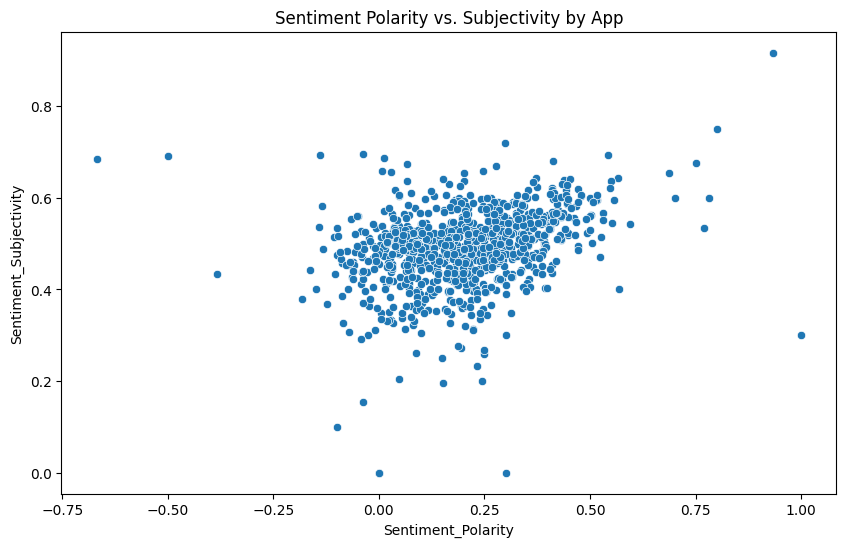

In [109]:
app_sentiment_summary = data_reviews.groupby('App')[['Sentiment_Polarity', 'Sentiment_Subjectivity']].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=app_sentiment_summary, x='Sentiment_Polarity', y='Sentiment_Subjectivity')
plt.title('Sentiment Polarity vs. Subjectivity by App')
plt.show()

# Summary of Data reviews and conclusion
## App reviews
- They are reliable. THe center clustering suggests that the reviews are neutral in polarity and have some level of objectivity to them. The best term to describe this is balanced

## Conclusion
- Free apps are more likely to be installed
- Also key to note that these apps predominantly Google and Facebook (now META) have multiple leading applications with some installed by default on Android. Brand name and method of aquisition play a heavy part in installation lead.
- The top app is Subway Surfers and the leading apps are not in the leadig category meaning category in itself is not a strong factor w.r.t. installation magnitude.
- Some foregn app information was lost due to the method of aquisition meaning the validity of those entries was compromised.
- The coefficient for the AUTO_AND_VEHICLES category is -0.9649, meaning apps in this category have fewer installs compared to the baseline 
- Price: The coefficient for Price is -1.7558, suggesting that as the corellation is negative. The more expensive your app is, the less installs it will have
- The p-value for the log-likelihood ratio (LLR) is 0. This means that the model is significant i.e. there is a relationship between installs and at least one variable